In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys 
import utilities as utils

sys.path.append(r"C:\Users\K.A.C\Desktop\ITU Dersler\Image Processing\Image-Processing\Canny Edge Detector\src")

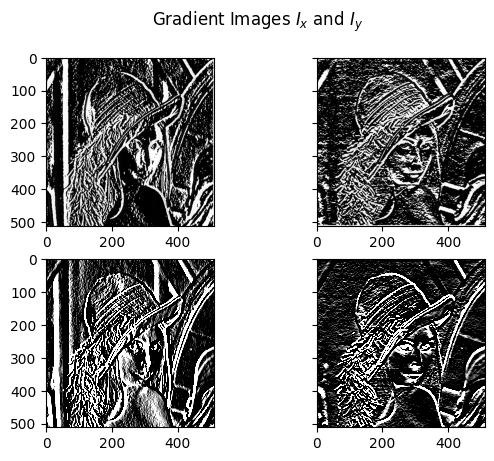

In [4]:
gaus = utils.get1D_gaussian(2)
gaus_cv = cv2.getGaussianKernel(5, sigma=0)
img = cv2.imread(r"C:\Users\K.A.C\Desktop\ITU Dersler\Image Processing\Image-Processing\Canny Edge Detector\images\Lenna.png")
img_gray = utils.convert2gray(img)

sobelx = cv2.Sobel(img_gray,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img_gray,cv2.CV_64F,0,1,ksize=5)


gaus = utils.get1D_gaussian(1)

blur_img = utils.conv_1d(img_gray, gaus, 0)
blur_img = utils.conv_1d(blur_img, gaus, 1)

sobel_x = utils.conv_1d(blur_img, utils.GAUSS_KERNEL, 1)
sobel_x = utils.conv_1d(sobel_x, utils.DER_KERNEL, 0)

sobel_y = utils.conv_1d(blur_img, utils.GAUSS_KERNEL, 0)
sobel_y = utils.conv_1d(sobel_y, utils.DER_KERNEL, 1)

# sobel_x = ((sobel_x > 128) * 1) * sobel_x
# sobel_x = sobel_x.astype(np.float64) 

# sobel_y = ((sobel_y > 128) * 1) * sobel_y
# sobel_y = sobel_y.astype(np.float64) 

# sobel_x = utils.nms(sobel_x)
# sobel_y = utils.nms(sobel_y)

# mask = utils.threshold(sobel_x, 50, 200)
# sobel_x = sobel_x * mask

# mask = utils.threshold(sobel_y, 50, 200)
# sobel_y = sobel_y * mask

f, axes = plt.subplots(2, 2, sharey=True)
f.suptitle("Gradient Images $I_x$ and $I_y$") 

axes[0, 0].imshow(sobel_x, cmap='gray', vmin=0, vmax=255)
axes[0, 1].imshow(sobel_y, cmap='gray', vmin=0, vmax=255)

axes[1, 0].imshow(sobelx, cmap='gray', vmin=0, vmax=255)
axes[1, 1].imshow(sobely, cmap='gray', vmin=0, vmax=255)
plt.show()

In [12]:
def nms(theta : np.ndarray, G : np.ndarray):
    G_nms = np.zeros_like(G)
    for i in range(1, theta.shape[0]-1):
        for j in range(1, theta.shape[1]-1):
            u, d = 255, 255
            #angle 0
            if (0 <= theta[i,j] < 22.5) or (157.5 <= theta[i,j] <= 180) or (-22.5 <= theta[i,j] < 0) or (-180 <= theta[i,j] < -157.5):
                u = G[i, j+1]
                d = G[i, j-1]
            #angle 45
            elif (22.5 <= theta[i,j] < 67.5) or (-157.5 <= theta[i,j] < -122.5):
                u = G[i+1, j-1]
                d = G[i-1, j+1]
            #angle 90
            elif (67.5 <= theta[i,j] < 112.5) or (-122.5 <= theta[i,j] < -67.5):
                u = G[i+1, j]
                d = G[i-1, j]
            #angle 135
            elif (112.5 <= theta[i,j] < 157.5) or (-67.5 <= theta[i,j] < -22.5):
                u = G[i-1, j-1]
                d = G[i+1, j+1]
                
            
            if u < G[i, j] and d < G[i, j]:
                G_nms[i, j] = G[i, j]
                              
    return G_nms

0.0


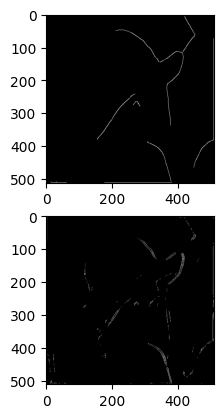

In [20]:

img = cv2.imread(r"C:\Users\K.A.C\Desktop\ITU Dersler\Image Processing\Image-Processing\Canny Edge Detector\images\Lenna.png")
img_gray = utils.convert2gray(img)

sobelx = cv2.Sobel(img_gray,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img_gray,cv2.CV_64F,0,1,ksize=5)



gaus = utils.get1D_gaussian(3)

blur_img = utils.conv_1d(img_gray, gaus, 0)
blur_img = utils.conv_1d(blur_img, gaus, 1)

sobel_x = cv2.Sobel(blur_img,cv2.CV_64F,1,0,ksize=3)
sobel_y = cv2.Sobel(blur_img,cv2.CV_64F,0,1,ksize=3)

G = np.sqrt(sobel_x**2 + sobel_y**2 )

theta = np.degrees(np.arctan2(sobel_y, sobel_x))

can = cv2.Canny(blur_img, 50, 200)

G, theta = utils.sobel_filters(blur_img)

G_nms = nms(theta, G)

mask = utils.threshold(G_nms, 50, 200)
G_th = G_nms * mask

f, ax = plt.subplots(2, 1, sharey=True)
ax[0].imshow(can, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(G_th, cmap='gray', vmin=0, vmax=255)

plt.show()